In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse.linalg import svds

In [2]:
ratings = pd.read_excel("./ml-100k/ml-100k/ratings.xlsx")
ratings_matrix = ratings.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)
ratings_matrix1 = ratings.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)
users_df = pd.read_excel("./ml-100k/ml-100k/userData.xlsx")
movies_df = pd.read_excel("./ml-100k/ml-100k/movieData.xlsx")
#genre= pd.read_excel("./ml-100k/ml-100k/genre.xlsx") ## movie genre information
ratings_matrix.head()
print(users_df.iloc[0])

UserID                    1
Age                      24
Gender                    0
Occupation       technician
administrator             0
artist                    0
doctor                    0
educator                  0
engineer                  0
entertainment             0
executive                 0
healthcare                0
homemaker                 0
lawyer                    0
librarian                 0
marketing                 0
none                      0
other                     0
programmer                0
retired                   0
scientist                 0
salesman                  0
technician                1
student                   0
writer                    0
Zipcode               85711
Name: 0, dtype: object


In [3]:
movies_kmeans = movies_df.drop('Title',axis=1) #movies_df.as_matrix()
#movies_kmeans = movies_kmeans.drop('Title',axis=1) #movies_df.as_matrix()
movies_kmeans = movies_kmeans.drop('MovieID',axis=1) #movies_df.as_matrix()
print(movies_kmeans.head())
'''movies_np = np.delete(movies_np,0,1) # deleting the movie ID
movies_np = np.delete(movies_np,0,1) # deleting the Movie name
movies_np contains only the classes of the movies which can be clustered
KMeans clustering of Movies'''
kmeans_movies = KMeans(n_clusters=7).fit(movies_kmeans)## later can be improves by tring wss and get a good estimate for k
#print(movies_kmeans.loc[0])
len(kmeans_movies.labels_)#1682
movie_clusterids=[]
#print(movies_kmeans.loc[0].shape)
#print(kmeans_movies.predict(movies_kmeans.loc[0].reshape(1,-1)));
movies_kmeans_np = movies_kmeans.as_matrix()
print(type(movies_kmeans_np))
for row in movies_kmeans_np:
    #print(row)
    value = kmeans_movies.predict(row.reshape(1,-1))
    #print()
    movie_clusterids.append(value.tolist());
movie_clusteroids=np.ndarray.flatten(np.asarray(movie_clusterids))
#print(movie_clusteroids.tolist())
movies_df['Movie_ClusterID'] = movie_clusteroids.tolist()
movies_df.head()
#print(len(kmeans_movies.cluster_centers_))## 7 clusters and some value for each genre
## additional task is to map which movie belongs to which cluster--- TO BE DONE

   unknown  Action  Adventure  Animation  Children's  Comedy  Crime  \
0        0       0          0          1           1       1      0   
1        0       1          1          0           0       0      0   
2        0       0          0          0           0       0      0   
3        0       1          0          0           0       1      0   
4        0       0          0          0           0       0      1   

   Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  \
0            0      0        0          0       0        0        0        0   
1            0      0        0          0       0        0        0        0   
2            0      0        0          0       0        0        0        0   
3            0      1        0          0       0        0        0        0   
4            0      1        0          0       0        0        0        0   

   Sci-Fi  Thriller  War  Western  
0       0         0    0        0  
1       0         1 

,MovieID,Title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Movie_ClusterID
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,6


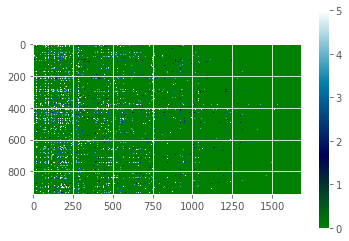

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
ratings=np.array(ratings_matrix)
fig= plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(ratings, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
plt.show()

plt.figure()
movies_df.plot(kind='scatter', x='Movie_ClusterID', y='MovieID');


In [5]:
## Now get the users data and cluster them aswell
#print(users_df.iloc[0])
users_kmeans=users_df.drop('Occupation',axis=1)
users_kmeans=users_kmeans.drop('Zipcode',axis=1)
users_kmeans=users_kmeans.drop('UserID',axis=1)
#KMeans clustering of Users
kmeans_users = KMeans(n_clusters=5).fit(users_kmeans)## later can be improved by tring wss and get a good estimate for k
#len(kmeans_users.labels_)#943
kmeans_users.cluster_centers_## 7 clusters and some value for each genre
## additional task is to map which movie belongs to which cluster--- TO BE DONE
user_clusterids=[]
users_kmeans_np = users_kmeans.as_matrix()
for row in users_kmeans_np:
    value = kmeans_users.predict(row.reshape(1,-1))
    user_clusterids.append(value.tolist());
user_clusteroids=np.ndarray.flatten(np.asarray(user_clusterids))
#print(user_clusteroids)
users_df['User_ClusterID'] = user_clusteroids.tolist()
users_df.head()

,UserID,Age,Gender,Occupation,administrator,artist,doctor,educator,engineer,entertainment,...,other,programmer,retired,scientist,salesman,technician,student,writer,Zipcode,User_ClusterID
0,1,24,0,technician,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,85711,0
1,2,53,0,other,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,94043,4
2,3,23,0,writer,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,32067,3
3,4,24,0,technician,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,43537,0
4,5,33,1,other,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,15213,2


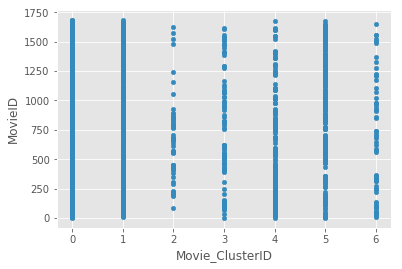

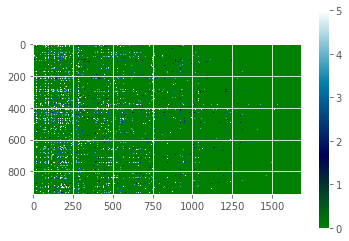

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
ratings=np.array(ratings_matrix)
fig= plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
plt.imshow(ratings, interpolation='nearest', cmap=plt.cm.ocean)
plt.colorbar()
plt.show()

plt.figure()
users_df.plot(kind='scatter', x='Age', y='User_ClusterID');

In [7]:
#cluster Rating matrix for users and Items
cluster_rating = np.zeros((len(kmeans_users.cluster_centers_),len(kmeans_movies.cluster_centers_)))
filteredUsers=[0 for i in range(len(kmeans_users.cluster_centers_))]
filteredMovies=[0 for j in range(len(kmeans_movies.cluster_centers_))]
#print(cluster_rating) ##5x7
#[(index, row.index(val)) for index, row in enumerate(cluster_rating) if val in row]
usersMatrix = users_df.as_matrix()
for i,clusterRow in enumerate(cluster_rating):
    # i ==> my userClusterNumber, j=> Item/MovieClusterNumber
    filteredUsers[i]=users_df.loc[users_df['User_ClusterID'] == i]
    #print (filteredUsers[i].User_ClusterID)## --- list of users for each cluster

clusterRatingTranspose= cluster_rating.transpose()
for j,clusterCol in enumerate(clusterRatingTranspose):
    filteredMovies[j]=movies_df.loc[movies_df['Movie_ClusterID'] == j]
print(users_df.iloc[0])

UserID                     1
Age                       24
Gender                     0
Occupation        technician
administrator              0
artist                     0
doctor                     0
educator                   0
engineer                   0
entertainment              0
executive                  0
healthcare                 0
homemaker                  0
lawyer                     0
librarian                  0
marketing                  0
none                       0
other                      0
programmer                 0
retired                    0
scientist                  0
salesman                   0
technician                 1
student                    0
writer                     0
Zipcode                85711
User_ClusterID             0
Name: 0, dtype: object


In [9]:
#print(type(filteredMovies))
#print(ratings_matrix[1][2])
#print(ratings_matrix)
cluster_ratings_dict={}
for j,movieList in enumerate(filteredMovies):
        for k,movie in enumerate(movieList.iterrows()):
            ratingList=[]
            rating=0
            for i,userList in enumerate(filteredUsers):
                avgNum=0;
                #nR=0;
                ratingsum=0;
                for user in userList.iterrows():
                    #print(movie[0],",",user[0])
                    if(ratings_matrix[movie[0]+1][user[0]+1] !=0):
                        ratingsum=ratingsum+ratings_matrix[movie[0]+1][user[0]+1]
                        avgNum=avgNum+1
                    if(avgNum !=0):
                 #       nR=nR+1
                        rating= (ratingsum/avgNum);
                        ratingList.append(rating)
                    else:
                        rating=0
                        
                #print("Cluster i",i,"movie k",k,rating)
                cluster_ratings_dict[i,j]=ratingList

#print(cluster_ratings_dict)
                    


In [10]:
print(movies_df.iloc[0])
#type(cluster_ratings_dict[0,0])
#np.asarray(cluster_ratings_dict[0,0]).mean()
for key in cluster_ratings_dict:
    cluster_ratings_dict[key]=np.asarray(cluster_ratings_dict[key]).mean()
print(cluster_ratings_dict) ##looks like data is biased or something wrongg
# got my clusterwise data

MovieID                           1
Title              Toy Story (1995)
unknown                           0
Action                            0
Adventure                         0
Animation                         1
Children's                        1
Comedy                            1
Crime                             0
Documentary                       0
Drama                             0
Fantasy                           0
Film-Noir                         0
Horror                            0
Musical                           0
Mystery                           0
Romance                           0
Sci-Fi                            0
Thriller                          0
War                               0
Western                           0
Movie_ClusterID                   3
Name: 0, dtype: object
{(0, 0): 3.0, (1, 0): 3.0, (2, 0): 3.0, (3, 0): 3.0, (4, 0): 3.0, (0, 1): 3.0, (1, 1): 3.0, (2, 1): 3.0, (3, 1): 3.0, (4, 1): 3.0, (0, 2): 4.0, (1, 2): 4.0, (2, 2): 4.0, (3, 2): 4.0, (4

In [11]:
#ratings_matrix_1=ratings_matrix
ratingsArray=ratings_matrix1.as_matrix()
ratingsArrayAfterCluster=ratings_matrix.as_matrix()
print((np.subtract(ratingsArrayAfterCluster,ratingsArray)).sum())

print("success")#0.273828756019 #0.273828756019
baba=0
noo=0
for i,row in enumerate(ratingsArrayAfterCluster):
    for j,val in enumerate(row):
        if(val==0):
            baba=baba+1
            #print(i,",",j)

print("success")#0.273828756019 #0.273828756019
print("helloooooo")#0.273828756019 #0.273828756019

for i,row in enumerate(ratingsArray):
    for j,val in enumerate(row):
        if(val==0):
            #print(i,",",j)
            noo=noo+1
print("baba",baba)
print("noo",noo)

0.0
success
success
helloooooo
baba 1486126
noo 1486126


In [12]:
'''
if rating is 0 in ratings_matrix then:
    get the clusterID for that movie,user from their respective dataframes = i,j
    rating_matrix[a][b] = dict[i,j]
do SVD
then recommend
'''
print((np.subtract(ratingsArrayAfterCluster,ratingsArray)).sum(),"same")
#ratings_matrix_1=ratings_matrix
#ratingsArray=ratings_matrix_1.as_matrix()
#ratingsArrayAfterCluster=ratings_matrix.as_matrix()
#print((np.subtract(ratingsArrayAfterCluster,ratingsArray)).mean())

print("success")#0.273828756019 #0.273828756019
print(len(users_df.columns)-1)

type(ratingsArrayAfterCluster)
#type()#u cant update a tuple
for i,row in enumerate(ratingsArrayAfterCluster):
    for j,val in enumerate(row):
        if(val==0):
            #i+1, j+1 ids ki get the cluterIds
            uc=users_df.iloc[i][len(users_df.columns)-1]  #getClusterIdUser(i+1);
            mc=movies_df.iloc[j][len(movies_df.columns)-1] #getClusterIdMovie(j+1);
            ratingsArrayAfterCluster[i][j]=cluster_ratings_dict[uc,mc]

print((np.subtract(ratingsArrayAfterCluster,ratingsArray)).mean(),"non zero")

0.0 same
success
26
2.8682418196 non zero


In [13]:
'''
len(users_df.columns)-1 # location to look for clusterID
print(len(movies_df.columns)-1 )# location to look for clusterID
type(movies_df.iloc[0])#.'User_ClusterID'#['User_ClusterID']
movies_df.iloc[0][21]#.'User_ClusterID'#['User_ClusterID']
#movies_df.iloc[0][21]#.'User_ClusterID'#['User_ClusterID']

 pd.DataFrame(data=data[1:,1:],    # values
...              index=data[1:,0],    # 1st column as index
...              columns=data[0,1:])  # 1st row as the column names
'''
ifa=0
ifb=0
elsea=0
elseb=0
print("before")
for i,row in enumerate(ratingsArrayAfterCluster):
    for j,val in enumerate(row):
        if(val==0):
            ifa=ifa+1
        else:
            elsea=elsea+1

print("success")#0.273828756019 #0.273828756019
print("helloooooo")#0.273828756019 #0.273828756019

for i,row in enumerate(ratingsArray):
    for j,val in enumerate(row):
        if(val==0):
            ifb=ifb+1
        else:
            elseb=elseb+1

print("ifa",ifa,"ifb",ifb, "elsea",elsea, "elseb",elseb)#1486126... 1586126


before
success
helloooooo
ifa 0 ifb 1486126 elsea 1586126 elseb 100000


In [14]:
U, sigma, Vt = svds(ratingsArrayAfterCluster, k = 11)
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) #+ user_ratings_mean.reshape(-1, 1)
print(all_user_predicted_ratings)
print(ratingsArrayAfterCluster)
#reds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)
#preds_df.head()
#101 dalmition 2 (happy children)… toy story 4 (happy children) … Forrest Gump (1994) (serious)1
print("101 dal",all_user_predicted_ratings[4][224])#3.7900555536
print("toy story",all_user_predicted_ratings[4][0])#3.7900555536
print("forrest gump",all_user_predicted_ratings[4][68])#3.7900555536
#101 dal 2.5390169404
#toy story 3.8543684795
#forrest gump 2.77655022671

[[ 3.99153002  3.20563637  3.0236148  ...,  2.97844037  2.97676439
   2.97676439]
 [ 3.26158453  2.89951462  2.97738676 ...,  2.99559497  3.00160272
   3.00160272]
 [ 2.88792219  2.91993984  2.94360149 ...,  2.99569918  2.99668432
   2.99668432]
 ..., 
 [ 3.63996896  3.00671787  3.00508521 ...,  2.99435197  2.99652162
   2.99652162]
 [ 3.64714075  3.02448626  2.93825626 ...,  3.01818578  3.01935391
   3.01935391]
 [ 3.07970347  3.06264258  3.13896096 ...,  3.00287486  3.0025258
   3.0025258 ]]
[[ 5.          3.          4.         ...,  3.          3.          3.        ]
 [ 4.          3.          3.         ...,  3.          3.          3.        ]
 [ 2.67612293  3.          3.         ...,  3.          3.          3.        ]
 ..., 
 [ 5.          3.          3.         ...,  3.          3.          3.        ]
 [ 2.67612293  3.          3.         ...,  3.          3.          3.        ]
 [ 2.67612293  5.          3.         ...,  3.          3.          3.        ]]
101 dal 2.660

In [15]:
sum=0
maesum=0
num=0
for i,row in enumerate(ratingsArrayAfterCluster):
    for j,val in enumerate(row):
        if(val!=0):
            #print(i,",",j)
            num+=1
            sum=sum+((all_user_predicted_ratings[i][j] - ratingsArrayAfterCluster[i][j]) ** 2)
            maesum=maesum + abs((all_user_predicted_ratings[i][j] - ratingsArrayAfterCluster[i][j]))
print("RMSE:",np.sqrt(sum/num))#0.273828756019
print("MAE:",maesum/num)

RMSE: 0.265708015212
MAE: 0.094242233761


In [16]:

U, sigma, Vt = svds(ratingsArray, k = 11)
sigma = np.diag(sigma)
all_user_predicted_ratings1 = np.dot(np.dot(U, sigma), Vt) #+ user_ratings_mean.reshape(-1, 1)
print(all_user_predicted_ratings1)
print(ratingsArray)

sum=0
num=0
for i,row in enumerate(ratingsArray):
    for j,val in enumerate(row):
        if(val!=0):
            #print(i,",",j)
            num+=1
            sum=sum+((all_user_predicted_ratings1[i][j] - ratingsArray[i][j]) ** 2)
            maesum=maesum + abs((all_user_predicted_ratings[i][j] - ratingsArrayAfterCluster[i][j]))
print("RMSE:",np.sqrt(sum/num))#0.273828756019
print("MAE:",maesum/num)
print("101 dal",all_user_predicted_ratings1[4][224])#3.7900555536
print("toy story",all_user_predicted_ratings1[4][0])#3.7900555536
print("forrest gump",all_user_predicted_ratings1[4][68])#3.7900555536
#101 dal 0.918162990294
#toy story 3.61582774472
#forrest gump 0.952631654292

[[  4.26237254e+00   2.09112252e+00   1.28569761e+00 ...,  -8.43144566e-03
    1.94399717e-02   5.66351275e-02]
 [  2.04406548e+00  -2.07839336e-02   6.39208939e-02 ...,   9.90179692e-03
   -7.18153355e-03  -2.31257240e-02]
 [ -1.47827871e-01  -3.39672047e-02   1.08210433e-01 ...,   1.98062527e-02
   -1.96828231e-03  -6.58959892e-03]
 ..., 
 [  1.99479318e+00  -3.02989554e-02   3.04616155e-01 ...,  -7.88571476e-04
   -2.83850559e-03  -2.06020901e-03]
 [  1.31130616e+00   9.05904694e-02  -4.10772244e-01 ...,   1.46876592e-02
    4.30082406e-03  -2.22242917e-02]
 [  1.89267782e+00   2.14860507e+00   9.33052973e-01 ...,  -9.88863425e-03
    2.01610801e-02   8.70334298e-03]]
[[ 5.  3.  4. ...,  0.  0.  0.]
 [ 4.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 5.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  5.  0. ...,  0.  0.  0.]]
RMSE: 2.25914057738
MAE: 2.28395150746
101 dal 0.918162990294
toy story 3.61582774472
forrest gump 0.952631654292


In [ ]:
ratingsArray

In [ ]:
(np.subtract(ratingsArrayAfterCluster,ratingsArray)).mean()

In [ ]:
#userid 5 movie id 376
